# Market Basket Analysis 

Performing analysis to identify which products are brought together by users.

#### Dataset

Online Retail Dataset. This is a dataset containing transnational transactions made on a UK-based online retail store between 01/12/2010 and 09/12/2011. It comprises 541909 rows, with 8 attributes:

InvoiceNo: a unique 6-digit number assigned to each transaction. If this code starts with letter ‘C’, then the order was cancelled.

StockCode: a unique 5-digit number assigned to each distinct product.

Description: the product name.

Quantity: the number of each product (item) purchased per transaction.

InvoiceDate: the date and time each transaction was completed.

UnitPrice: the product price per unit in pounds sterling.

CustomerID: a unique 5-digit number assigned to each customer.

Country: the name of the country from where the purchase was made.

# _`Data Visualisation`_

In [1]:
#importing libraries for visualisation

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Load the file into dataframe 
df = pd.read_excel("http://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx")
#Check the first 5 rows
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [3]:
# check shape
df.shape

(541909, 8)

In [4]:
#check dataframe for null and datatype 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [5]:
#check the details of numeriacl data
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [6]:
# Percentage null values 
df.isna().sum()/df.isna().count()*100

InvoiceNo       0.000000
StockCode       0.000000
Description     0.268311
Quantity        0.000000
InvoiceDate     0.000000
UnitPrice       0.000000
CustomerID     24.926694
Country         0.000000
dtype: float64

#### Dropping Null values  
     - Dropping Description with Null Values (Since we are performing ananlysis based on description, null values should be dropped)
     - Customer with null CustomerID (almost 25% of customerID is null)

In [7]:
df.dropna(inplace=True) #dropping null values 

In [8]:
df.shape # after dropping null values

(406829, 8)

In [9]:
# Percentage null values 
df.isna().sum()/df.isna().count()*100

InvoiceNo      0.0
StockCode      0.0
Description    0.0
Quantity       0.0
InvoiceDate    0.0
UnitPrice      0.0
CustomerID     0.0
Country        0.0
dtype: float64

##### No more null values in Dataframe

In [10]:
df['InvoiceNo']

0         536365
1         536365
2         536365
3         536365
4         536365
           ...  
541904    581587
541905    581587
541906    581587
541907    581587
541908    581587
Name: InvoiceNo, Length: 406829, dtype: object

###### There are cancelled transcations we will remove them from dataframe. They have C in their InvoiceNo

In [11]:
#Convert the InvoiceNo column to string
df["InvoiceNo"] = df["InvoiceNo"].astype('str')

#Remove rows with invoices that contain a "C"
df = df[~df["InvoiceNo"].str.contains("C")]

len(df)

397924

In [12]:
df['Country'].value_counts()

United Kingdom          354345
Germany                   9042
France                    8342
EIRE                      7238
Spain                     2485
Netherlands               2363
Belgium                   2031
Switzerland               1842
Portugal                  1462
Australia                 1185
Norway                    1072
Italy                      758
Channel Islands            748
Finland                    685
Cyprus                     614
Sweden                     451
Austria                    398
Denmark                    380
Poland                     330
Japan                      321
Israel                     248
Unspecified                244
Singapore                  222
Iceland                    182
USA                        179
Canada                     151
Greece                     145
Malta                      112
United Arab Emirates        68
European Community          60
RSA                         58
Lebanon                     45
Lithuani

#####  UK has highest transcation, followed by Germany, France

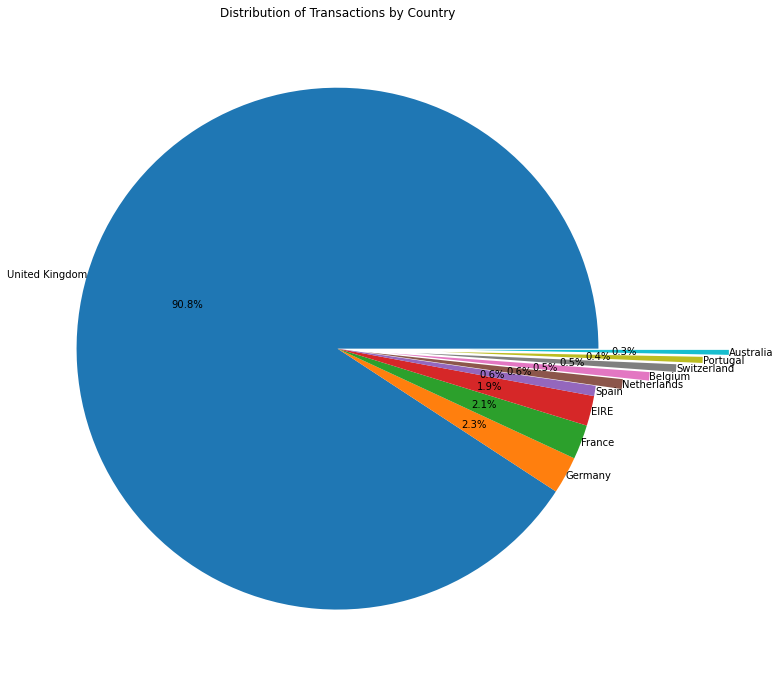

In [13]:
# distribution of transactions for top 10 countries 
top10 = df["Country"].value_counts().head(10)
plt.figure(figsize=[12,12])
explode = (0, 0, 0, 0, 0, 0.1, 0.2, 0.3, 0.4 , 0.5)
plt.pie(top10,labels=top10.index, explode=explode, autopct = '%0.1f%%',labeldistance=1)
plt.title("Distribution of Transactions by Country")
plt.show()

In [14]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


## _`UK MARKET ANALYSIS`_

- We will now create a basket for UK market.
- We will need InvoiceNo, Description and quantity for our analysis


In [15]:
basket_uk = df[df['Country'] =="United Kingdom"]\
        .groupby(['InvoiceNo', 'Description'])["Quantity"]\
        .sum().unstack()\
        .reset_index().fillna(0)\
        .set_index("InvoiceNo")

# choose country UK, group it by invoiceNo and Description

basket_uk.head()

Description,4 PURPLE FLOCK DINNER CANDLES,50'S CHRISTMAS GIFT BAG LARGE,DOLLY GIRL BEAKER,I LOVE LONDON MINI BACKPACK,NINE DRAWER OFFICE TIDY,OVAL WALL MIRROR DIAMANTE,RED SPOT GIFT BAG LARGE,SET 2 TEA TOWELS I LOVE LONDON,SPACEBOY BABY GIFT SET,TOADSTOOL BEDSIDE LIGHT,...,ZINC STAR T-LIGHT HOLDER,ZINC SWEETHEART SOAP DISH,ZINC SWEETHEART WIRE LETTER RACK,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK,ZINC WIRE KITCHEN ORGANISER,ZINC WIRE SWEETHEART LETTER TRAY
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536365,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536366,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536367,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536368,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536369,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
basket_uk.columns

Index([' 4 PURPLE FLOCK DINNER CANDLES', ' 50'S CHRISTMAS GIFT BAG LARGE',
       ' DOLLY GIRL BEAKER', ' I LOVE LONDON MINI BACKPACK',
       ' NINE DRAWER OFFICE TIDY', ' OVAL WALL MIRROR DIAMANTE ',
       ' RED SPOT GIFT BAG LARGE', ' SET 2 TEA TOWELS I LOVE LONDON ',
       ' SPACEBOY BABY GIFT SET', ' TOADSTOOL BEDSIDE LIGHT ',
       ...
       'ZINC STAR T-LIGHT HOLDER ', 'ZINC SWEETHEART SOAP DISH',
       'ZINC SWEETHEART WIRE LETTER RACK', 'ZINC T-LIGHT HOLDER STAR LARGE',
       'ZINC T-LIGHT HOLDER STARS LARGE', 'ZINC T-LIGHT HOLDER STARS SMALL',
       'ZINC TOP  2 DOOR WOODEN SHELF ', 'ZINC WILLIE WINKIE  CANDLE STICK',
       'ZINC WIRE KITCHEN ORGANISER', 'ZINC WIRE SWEETHEART LETTER TRAY'],
      dtype='object', name='Description', length=3844)

##### Items sold most

In [17]:
item_sum=basket_uk.sum()
pd.concat([item_sum], axis=1, keys=['item_sum']).sort_values(by='item_sum', ascending=False).head(15)
#top 10 selling ietms in UK

,item_sum
Description,
"PAPER CRAFT , LITTLE BIRDIE",80995.0
MEDIUM CERAMIC TOP STORAGE JAR,76919.0
WORLD WAR 2 GLIDERS ASSTD DESIGNS,49182.0
JUMBO BAG RED RETROSPOT,41981.0
WHITE HANGING HEART T-LIGHT HOLDER,34648.0
ASSORTED COLOUR BIRD ORNAMENT,32727.0
POPCORN HOLDER,28935.0
PACK OF 12 LONDON TISSUES,24337.0
BROCADE RING PURSE,22711.0


<AxesSubplot:title={'center':'Best Selling Products'}, xlabel='Description'>

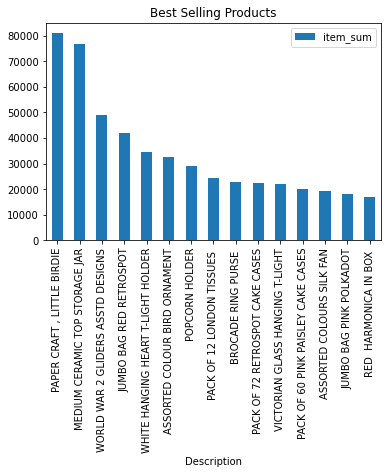

In [18]:

pd.concat([item_sum], axis=1, keys=['item_sum']).sort_values(by='item_sum', ascending=False).head(15).plot(kind="bar", title="Best Selling Products")


______________________

In [19]:
basket_uk.describe()

Description,4 PURPLE FLOCK DINNER CANDLES,50'S CHRISTMAS GIFT BAG LARGE,DOLLY GIRL BEAKER,I LOVE LONDON MINI BACKPACK,NINE DRAWER OFFICE TIDY,OVAL WALL MIRROR DIAMANTE,RED SPOT GIFT BAG LARGE,SET 2 TEA TOWELS I LOVE LONDON,SPACEBOY BABY GIFT SET,TOADSTOOL BEDSIDE LIGHT,...,ZINC STAR T-LIGHT HOLDER,ZINC SWEETHEART SOAP DISH,ZINC SWEETHEART WIRE LETTER RACK,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK,ZINC WIRE KITCHEN ORGANISER,ZINC WIRE SWEETHEART LETTER TRAY
count,16649.000000,16649.000000,16649.000000,16649.000000,16649.000000,16649.000000,16649.000000,16649.000000,16649.000000,16649.00000,...,16649.000000,16649.000000,16649.000000,16649.000000,16649.000000,16649.000000,16649.000000,16649.000000,16649.000000,16649.000000
mean,0.008049,0.101928,0.039702,0.010872,0.002643,0.006787,0.093459,0.145955,0.010872,0.00012,...,0.000481,0.003604,0.014415,0.107514,0.001442,0.255751,0.000601,0.120548,0.001442,0.004325
std,0.252441,3.306649,0.724841,0.229261,0.086263,0.212284,3.292710,5.320457,0.189690,0.01550,...,0.062001,0.139028,0.288176,1.532790,0.131519,3.904117,0.026841,1.439495,0.064828,0.215019
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,12.000000,400.000000,48.000000,12.000000,6.000000,24.000000,400.000000,600.000000,6.000000,2.00000,...,8.000000,12.000000,24.000000,96.000000,12.000000,216.000000,2.000000,48.000000,4.000000,24.000000


#### We can see that there values thats are non 0 and 1. We need values in 1 and 0. 1 to represnt if product is present and 0 if absent.

In [20]:
#Create function to hot encode the values
def encode_values(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

#Apply function to data
basket_ukencoded = basket_uk.applymap(encode_values)

basket_ukencoded

Description,4 PURPLE FLOCK DINNER CANDLES,50'S CHRISTMAS GIFT BAG LARGE,DOLLY GIRL BEAKER,I LOVE LONDON MINI BACKPACK,NINE DRAWER OFFICE TIDY,OVAL WALL MIRROR DIAMANTE,RED SPOT GIFT BAG LARGE,SET 2 TEA TOWELS I LOVE LONDON,SPACEBOY BABY GIFT SET,TOADSTOOL BEDSIDE LIGHT,...,ZINC STAR T-LIGHT HOLDER,ZINC SWEETHEART SOAP DISH,ZINC SWEETHEART WIRE LETTER RACK,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK,ZINC WIRE KITCHEN ORGANISER,ZINC WIRE SWEETHEART LETTER TRAY
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536365,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536366,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536367,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536368,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536369,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581582,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
581583,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
581584,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
basket_ukencoded.describe()

Description,4 PURPLE FLOCK DINNER CANDLES,50'S CHRISTMAS GIFT BAG LARGE,DOLLY GIRL BEAKER,I LOVE LONDON MINI BACKPACK,NINE DRAWER OFFICE TIDY,OVAL WALL MIRROR DIAMANTE,RED SPOT GIFT BAG LARGE,SET 2 TEA TOWELS I LOVE LONDON,SPACEBOY BABY GIFT SET,TOADSTOOL BEDSIDE LIGHT,...,ZINC STAR T-LIGHT HOLDER,ZINC SWEETHEART SOAP DISH,ZINC SWEETHEART WIRE LETTER RACK,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK,ZINC WIRE KITCHEN ORGANISER,ZINC WIRE SWEETHEART LETTER TRAY
count,16649.000000,16649.000000,16649.000000,16649.000000,16649.000000,16649.000000,16649.000000,16649.000000,16649.000000,16649.00000,...,16649.00000,16649.000000,16649.000000,16649.000000,16649.00000,16649.000000,16649.000000,16649.000000,16649.000000,16649.000000
mean,0.002102,0.005886,0.006006,0.003304,0.001502,0.003364,0.005105,0.010631,0.005586,0.00006,...,0.00006,0.001141,0.004565,0.008109,0.00012,0.013214,0.000541,0.010151,0.000661,0.001141
std,0.045803,0.076498,0.077270,0.057383,0.038722,0.057900,0.071272,0.102562,0.074532,0.00775,...,0.00775,0.033764,0.067411,0.089685,0.01096,0.114194,0.023245,0.100241,0.025696,0.033764
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,...,1.00000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000


### _`Analysing Products Bought Together`_

Since we are analysing products bought together, we will use only those transcations having more than 1 items

In [25]:
basket2_uk = basket_ukencoded[(basket_ukencoded > 0).sum(axis=1) >= 2]

basket2_uk

Description,4 PURPLE FLOCK DINNER CANDLES,50'S CHRISTMAS GIFT BAG LARGE,DOLLY GIRL BEAKER,I LOVE LONDON MINI BACKPACK,NINE DRAWER OFFICE TIDY,OVAL WALL MIRROR DIAMANTE,RED SPOT GIFT BAG LARGE,SET 2 TEA TOWELS I LOVE LONDON,SPACEBOY BABY GIFT SET,TOADSTOOL BEDSIDE LIGHT,...,ZINC STAR T-LIGHT HOLDER,ZINC SWEETHEART SOAP DISH,ZINC SWEETHEART WIRE LETTER RACK,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK,ZINC WIRE KITCHEN ORGANISER,ZINC WIRE SWEETHEART LETTER TRAY
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536365,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536366,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536367,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536368,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536372,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581582,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
581583,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
581584,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Now we have 15378 transcations 

 #### Apply the apriori algorithm to find the most frequently purchased items brought together in the dataset.

In [26]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [57]:
#Generate the frequent itemsets
frequent_itemsets = apriori(basket2_uk, min_support=0.03, use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets.head(10)

c:\users\monica gowda\appdata\local\programs\python\python38\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
c:\users\monica gowda\appdata\local\programs\python\python38\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets,length
0,0.040843,(6 RIBBONS RUSTIC CHARM),1
1,0.038176,(60 TEATIME FAIRY CAKE CASES),1
2,0.044550,(ALARM CLOCK BAKELIKE GREEN),1
3,0.031933,(ALARM CLOCK BAKELIKE PINK),1
4,0.049298,(ALARM CLOCK BAKELIKE RED ),1
5,0.033819,(ANTIQUE SILVER T-LIGHT GLASS),1
6,0.084417,(ASSORTED COLOUR BIRD ORNAMENT),1
7,0.046761,(BAKING SET 9 PIECE RETROSPOT ),1
8,0.032908,(CHARLOTTE BAG SUKI DESIGN),1
9,0.031152,(CHILLI LIGHTS),1


#### Popular Items brought together

In [59]:
# finding itemsets having length 2
pd.set_option('max_colwidth', 800)
frequent_itemsets[(frequent_itemsets['length'] >= 2)]

c:\users\monica gowda\appdata\local\programs\python\python38\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets,length
105,0.032908,"(JUMBO BAG PINK POLKADOT, JUMBO BAG RED RETROSPOT)",2
106,0.031478,"(LUNCH BAG RED RETROSPOT, LUNCH BAG BLACK SKULL.)",2
104,0.030957,"(ROSES REGENCY TEACUP AND SAUCER , GREEN REGENCY TEACUP AND SAUCER)",2
107,0.030632,"(LUNCH BAG RED RETROSPOT, LUNCH BAG PINK POLKADOT)",2


#### Applying Association Rule

In [60]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1).sort_values("lift",ascending=False)
rules.head()

c:\users\monica gowda\appdata\local\programs\python\python38\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
4,(ROSES REGENCY TEACUP AND SAUCER ),(GREEN REGENCY TEACUP AND SAUCER),0.043900,0.039802,0.030957,0.705185,17.717202,0.029210,3.256952
5,(GREEN REGENCY TEACUP AND SAUCER),(ROSES REGENCY TEACUP AND SAUCER ),0.039802,0.043900,0.030957,0.777778,17.717202,0.029210,4.302452
6,(LUNCH BAG RED RETROSPOT),(LUNCH BAG PINK POLKADOT),0.072841,0.055086,0.030632,0.420536,7.634188,0.026620,1.630668
7,(LUNCH BAG PINK POLKADOT),(LUNCH BAG RED RETROSPOT),0.055086,0.072841,0.030632,0.556080,7.634188,0.026620,2.088574
0,(JUMBO BAG PINK POLKADOT),(JUMBO BAG RED RETROSPOT),0.052680,0.093197,0.032908,0.624691,6.702899,0.027999,2.416152


In [61]:
pd.options.display.max_rows = 999
rules[ (rules['lift'] >= 5) & (rules['confidence'] >= 0.4) ]

c:\users\monica gowda\appdata\local\programs\python\python38\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
4,(ROSES REGENCY TEACUP AND SAUCER ),(GREEN REGENCY TEACUP AND SAUCER),0.043900,0.039802,0.030957,0.705185,17.717202,0.029210,3.256952
5,(GREEN REGENCY TEACUP AND SAUCER),(ROSES REGENCY TEACUP AND SAUCER ),0.039802,0.043900,0.030957,0.777778,17.717202,0.029210,4.302452
6,(LUNCH BAG RED RETROSPOT),(LUNCH BAG PINK POLKADOT),0.072841,0.055086,0.030632,0.420536,7.634188,0.026620,1.630668
7,(LUNCH BAG PINK POLKADOT),(LUNCH BAG RED RETROSPOT),0.055086,0.072841,0.030632,0.556080,7.634188,0.026620,2.088574
0,(JUMBO BAG PINK POLKADOT),(JUMBO BAG RED RETROSPOT),0.052680,0.093197,0.032908,0.624691,6.702899,0.027999,2.416152
3,(LUNCH BAG BLACK SKULL.),(LUNCH BAG RED RETROSPOT),0.064646,0.072841,0.031478,0.486922,6.684737,0.026769,1.807051
2,(LUNCH BAG RED RETROSPOT),(LUNCH BAG BLACK SKULL.),0.072841,0.064646,0.031478,0.432143,6.684737,0.026769,1.647164


### Conclusion

-> The below products are brought together

- (JUMBO BAG PINK POLKADOT, JUMBO BAG RED RETROSPOT)
- (LUNCH BAG RED RETROSPOT, LUNCH BAG BLACK SKULL.)
- (ROSES REGENCY TEACUP AND SAUCER , GREEN REGENCY TEACUP AND SAUCER)
- (LUNCH BAG RED RETROSPOT, LUNCH BAG PINK POLKADOT)

-> (ROSES REGENCY TEACUP AND SAUCER , GREEN REGENCY TEACUP AND SAUCER) have the highest association values.
These were brought together amoung 3.9% of all transcations

-> We can use this information to place the products close to each other to increase overall sale.